Below are commonly asked interview questions about the Scikit-learn workflow, along with detailed answers:

---

### **1. What is Scikit-learn, and why is it used?**
**Answer:**
Scikit-learn is an open-source Python library widely used for machine learning. It provides simple and efficient tools for data mining, data analysis, and machine learning algorithms. It is built on top of NumPy, SciPy, and matplotlib.

**Key Features:**
- Implements supervised and unsupervised learning algorithms.
- Includes tools for data preprocessing, model evaluation, and hyperparameter tuning.
- Offers a consistent API across algorithms.

---

### **2. What is the typical workflow of a Scikit-learn machine learning project?**
**Answer:**
The typical Scikit-learn workflow consists of the following steps:

1. **Import Libraries**:
   ```python
   import numpy as np
   from sklearn.model_selection import train_test_split
   from sklearn.preprocessing import StandardScaler
   from sklearn.linear_model import LogisticRegression
   from sklearn.metrics import accuracy_score
   ```

2. **Load and Explore the Data**:
   - Load the dataset using Pandas or directly from Scikit-learn datasets.
   - Explore the dataset to understand its structure, features, and target variable.

3. **Split the Data**:
   - Split the dataset into training and testing sets.
   ```python
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   ```

4. **Preprocess the Data**:
   - Handle missing values, scale numerical features, and encode categorical variables.
   ```python
   scaler = StandardScaler()
   X_train = scaler.fit_transform(X_train)
   X_test = scaler.transform(X_test)
   ```

5. **Choose and Train a Model**:
   - Select an appropriate algorithm and train the model.
   ```python
   model = LogisticRegression()
   model.fit(X_train, y_train)
   ```

6. **Evaluate the Model**:
   - Evaluate the model’s performance using appropriate metrics.
   ```python
   y_pred = model.predict(X_test)
   print("Accuracy:", accuracy_score(y_test, y_pred))
   ```

7. **Hyperparameter Tuning**:
   - Optimize the model by tuning its hyperparameters.
   ```python
   from sklearn.model_selection import GridSearchCV
   param_grid = {'C': [0.1, 1, 10]}
   grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
   grid.fit(X_train, y_train)
   ```

---

### **3. How do you handle missing data in Scikit-learn?**
**Answer:**
Scikit-learn provides the `SimpleImputer` class to handle missing data. You can fill missing values with strategies such as mean, median, or a constant.

Example:
```python
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
```

---

### **4. How do you split your data into training and testing sets? Why is this important?**
**Answer:**
You use `train_test_split` from `sklearn.model_selection` to split data. This helps evaluate the model’s performance on unseen data.

Example:
```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

---

### **5. What are pipelines in Scikit-learn, and why are they useful?**
**Answer:**
Pipelines in Scikit-learn automate the workflow of preprocessing and modeling steps, ensuring that transformations are consistently applied.

**Example:**
```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
```

**Benefits:**
- Simplifies code and makes it more readable.
- Reduces the risk of data leakage.
- Ensures preprocessing steps are applied to both training and testing data.

---

### **6. How do you perform feature selection in Scikit-learn?**
**Answer:**
Feature selection reduces the number of input variables, improving model performance and reducing overfitting.

- **Using Variance Threshold**:
  Removes low-variance features.
  ```python
  from sklearn.feature_selection import VarianceThreshold
  selector = VarianceThreshold(threshold=0.1)
  X = selector.fit_transform(X)
  ```

- **Using Recursive Feature Elimination (RFE)**:
  Recursively removes least important features.
  ```python
  from sklearn.feature_selection import RFE
  from sklearn.linear_model import LogisticRegression

  model = LogisticRegression()
  rfe = RFE(model, n_features_to_select=5)
  X = rfe.fit_transform(X, y)
  ```

---

### **7. How do you evaluate model performance in Scikit-learn?**
**Answer:**
Scikit-learn provides several evaluation metrics depending on the task.

- **For Classification**:
  - Accuracy: `accuracy_score`
  - Precision, Recall, F1-Score: `classification_report`
  - ROC-AUC: `roc_auc_score`
  ```python
  from sklearn.metrics import classification_report, accuracy_score

  print(classification_report(y_test, y_pred))
  ```

- **For Regression**:
  - Mean Absolute Error (MAE): `mean_absolute_error`
  - Mean Squared Error (MSE): `mean_squared_error`
  - R^2 Score: `r2_score`
  ```python
  from sklearn.metrics import mean_absolute_error

  print("MAE:", mean_absolute_error(y_test, y_pred))
  ```

---

### **8. How do you tune hyperparameters in Scikit-learn?**
**Answer:**
- **Grid Search**:
  Tries all combinations of parameters.
  ```python
  from sklearn.model_selection import GridSearchCV

  param_grid = {'C': [0.1, 1, 10]}
  grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
  grid.fit(X_train, y_train)
  print("Best Parameters:", grid.best_params_)
  ```

- **Randomized Search**:
  Randomly samples parameter combinations.
  ```python
  from sklearn.model_selection import RandomizedSearchCV

  param_dist = {'C': [0.1, 1, 10]}
  random_search = RandomizedSearchCV(LogisticRegression(), param_dist, cv=5, n_iter=10)
  random_search.fit(X_train, y_train)
  ```

---

### **9. How do you save and load a trained model in Scikit-learn?**
**Answer:**
You use `joblib` or `pickle` to save and load models.

**Example**:
```python
from sklearn.externals import joblib

# Save model
joblib.dump(model, 'model.pkl')

# Load model
loaded_model = joblib.load('model.pkl')
```

---

### **10. How do you handle imbalanced datasets in Scikit-learn?**
**Answer:**
1. **Resampling**:
   - Oversampling (e.g., SMOTE).
   - Undersampling.
   ```python
   from imblearn.over_sampling import SMOTE
   smote = SMOTE()
   X_resampled, y_resampled = smote.fit_resample(X, y)
   ```

2. **Using Class Weights**:
   Set `class_weight='balanced'` in model parameters.
   ```python
   model = LogisticRegression(class_weight='balanced')
   ```

3. **Custom Metrics**:
   Use metrics like Precision-Recall AUC instead of accuracy.

---



### Every machine learning problem begins with Data.

In [3]:
import sklearn

In [4]:
from sklearn.datasets import load_iris

In [5]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
load_iris(return_X_Y=True)

TypeError: got an unexpected keyword argument 'return_X_Y'

In [13]:
x,y=load_iris(return_X_y=True)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
Model=LinearRegression()

In [14]:
Model.predict(x)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [15]:
Model.fit(x,y)

LinearRegression()

In [16]:
Model.predict(x)

array([-8.25493616e-02, -4.01284476e-02, -4.86276768e-02,  1.22998627e-02,
       -7.53667248e-02,  5.82910066e-02,  3.83367194e-02, -4.44863248e-02,
        1.98324281e-02, -8.21970989e-02, -1.01272512e-01,  7.59348686e-04,
       -8.98630676e-02, -1.02503649e-01, -2.26652208e-01, -4.10494982e-02,
       -3.31670043e-02, -2.16241562e-02, -3.21980063e-02, -1.07834994e-02,
       -4.35196609e-02,  5.41496547e-02, -1.22062394e-01,  1.76835660e-01,
        6.93528569e-02, -5.59002750e-03,  1.00228589e-01, -7.08754443e-02,
       -8.97319983e-02,  1.99658314e-02,  1.27831946e-02,  3.26017444e-02,
       -1.55848342e-01, -1.55367344e-01, -2.12718935e-02, -1.05063936e-01,
       -1.50176206e-01, -1.25101345e-01, -7.04002332e-03, -5.56769102e-02,
       -3.32980735e-02,  7.07502372e-02, -1.50559206e-02,  2.18071051e-01,
        1.41599717e-01,  3.19873432e-02, -4.88442021e-02, -1.45725887e-02,
       -9.00819270e-02, -6.33428789e-02,  1.20248442e+00,  1.28482413e+00,
        1.32433716e+00,  

In [17]:
from sklearn.neighbors import KNeighborsRegressor
mod=KNeighborsRegressor()

In [18]:
mod.fit(x,y)


KNeighborsRegressor()

In [19]:
mod.predict(x)

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1.2, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1.2, 1. , 1.6, 1. , 1.6, 1. , 1. , 1. , 1. , 1.4,
       1. , 1. , 1. , 1. , 1. , 1.8, 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 2. , 2. , 2. , 2. ,
       2. , 2. , 1.2, 2. , 2. , 2. , 1.8, 2. , 2. , 2. , 2. , 2. , 2. ,
       2. , 2. , 1.4, 2. , 2. , 2. , 1.8, 2. , 2. , 2. , 1.8, 2. , 2. ,
       2. , 2. , 2. , 1.6, 1.8, 2. , 2. , 2. , 1.8, 2. , 2. , 2. , 2. ,
       2. , 2. , 2. , 1.8, 2. , 2. , 2. ])

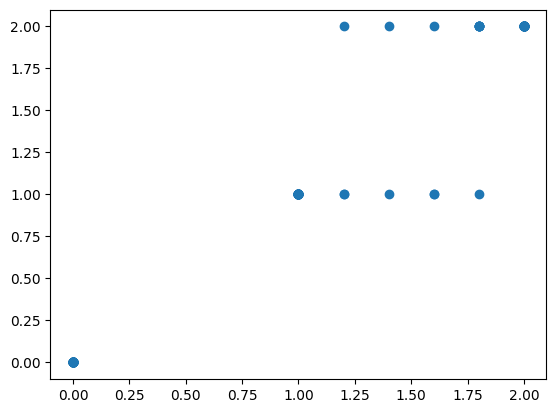

In [20]:
import matplotlib.pyplot as plt
pred=mod.predict(x)
plt.scatter(pred,y)

## 1. Data Cleaning And Preprocessing

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml

# Fetch the Titanic dataset
df = fetch_openml('titanic', version=1, as_frame=True)['data']

# Display information about the DataFrame
df.info()

# Check for missing values and print the result
missing_values = df.isnull()
print(missing_values)

# Alternatively, you can get a summary of missing values
print(df.isnull().sum())